In [81]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

In [13]:
df = pd.read_csv("SB5.csv", header=None)

In [14]:
df

,0,1,2,3,4,5,6,7,8,9,...,19190,19191,19192,19193,19194,19195,19196,19197,19198,19199
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1076,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1077,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1078,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
v = df.values
num_cols = v.shape[1]


10

In [20]:
im_1 = v[:,:1920]
im_1.shape

(1080, 1920)

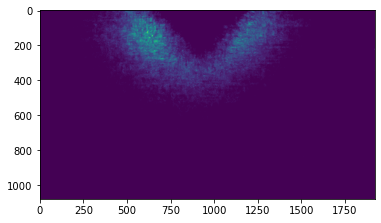

In [21]:
plt.imshow(im_1)

In [30]:
images = []
for i in range(10):
    start_col = i * 1920
    end_col = (i+1) * 1920
    image = v[:,start_col:end_col]
    images.append(image)

images = np.array(images)

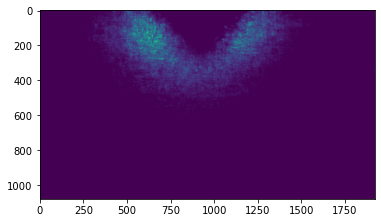

In [37]:
i = 9
plt.imshow(images[i,:,:])

In [39]:
np.all(images[0,:,:] == images[8,:,:])

False

In [41]:
# checking if each samples is different
images[0,200,750], images[1,200,750]

(48, 52)

In [49]:
X_data = images
X_data.shape

(10, 1080, 1920)

In [46]:
# generate labels
# call this class 2
y_data = np.ones(shape=(10,))
y_data = y_data * 2
y_data

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [50]:
# split into training/testing
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3)
X_train.shape, X_test.shape

((7, 1080, 1920), (3, 1080, 1920))

In [57]:
filename_labels = {
    "SB2.csv" : 0,
    "SB5.csv" : 1,
    "SB7.csv" : 2
}

def extract_images(array : np.ndarray, num_images):
    # takes in 2d array: (num_rows x (num_cols * num_images))
    images = []
    
    for i in range(num_images):
        start_col = i * 1920
        end_col = (i+1) * 1920
        image = array[:,start_col:end_col]
        images.append(image)
        
    images = np.array(images)
    
    return images # 3d array: (num_images x num_rows x num_cols)

def process_data(filename : str):
    df = pd.read_csv(filename, header=None)
    array = df.values # the raw CSV file data as an array
    num_images = int(array.shape[1] / 1920)
    
    images_in_class = extract_images(array, num_images) # 3d array: (num_images x num_rows x num_cols)
    X_data = images_in_class
    
    y_data = np.ones(shape=(num_images)) # array of ones, that is as long as the # of images we have
    label = filename_labels[filename]
    y_data = y_data * label
    
    return X_data, y_data    

In [60]:
X_sb2, y_sb2 = process_data("SB2.csv")
X_sb5, y_sb5 = process_data("SB5.csv")
X_sb7, y_sb7 = process_data("SB7.csv")

In [61]:
# Combine the data into one array
X_data = np.concatenate((X_sb2, X_sb5, X_sb7))
X_data.shape

(30, 1080, 1920)

In [63]:
y_data = np.concatenate((y_sb2, y_sb5, y_sb7))
y_data.shape

(30,)

In [67]:
X_data[0] # input for sample 0

array([[4, 4, 0, ..., 0, 0, 0],
       [1, 2, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [68]:
y_data[0] # output/target for sample 0

0.0

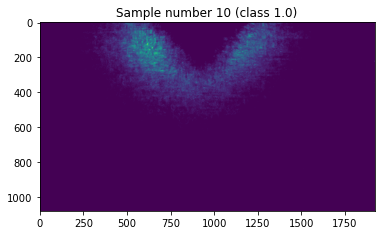

In [77]:
# look at the data
sample_num = 10
plt.imshow(X_data[sample_num])
plt.title(f"Sample number {sample_num} (class {y_data[sample_num]})")
plt.show()

In [87]:
def one_hot_encode(y_data):
    # takes in 1d y data, return one-hot-encoded version
    encoded = np_utils.to_categorical(y_data, num_classes=len(filename_labels))
    return encoded

def split_training_testing(X_data, y_data, test_size):
    y_encoded = one_hot_encode(y_data)
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_encoded, test_size=test_size, shuffle=True)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_training_testing(X_data, y_data, test_size=0.3)

In [88]:
print(f"X_train has {len(X_train)} samples\nX_test has {len(X_test)} samples\ny_train has {len(y_train)} samples\ny_test has {len(y_test)} samples\n")

X_train has 21 samples
X_test has 9 samples
y_train has 21 samples
y_test has 9 samples



In [89]:
y_train

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

In [86]:
y_enc = one_hot_encode(y_data)
y_enc

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)